## **Import Libraries**

In [ ]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
import timeit
import plotly.graph_objects as go
from collections import defaultdict
import math
import heapq


import ipywidgets as widgets
from ipywidgets import interact

## **Generate Dense Graph and Display Graph Functions**

In [ ]:
def create_dense_graph(n):
    """
    Function to create a densely connected graph
    Returns the graph as an adjacency matrix.
    :param n: Number of vertices
    """
    # Create an adjacency matrix filled with 0's
    matrix = [[0 for _ in range(n)] for _ in range(n)]

    # Use the formula n * (n - 1) for edges (complete graph)
    e = n * (n - 1)   # for varying e ( when v = 10 e is a array of 1 to n * (n-1))

    while e > 0:
        a = random.randint(0, n - 1)
        b = random.randint(0, n - 1)

        # Ensure there are no self-loops and no repeated edges
        if a != b and matrix[a][b] == 0:
            # Random weight between 1 and 100
            matrix[a][b] = random.randint(1, 100)
            e -= 1

    return matrix


def displayGraph(dense_graph):
    G = nx.Graph()

    # Add edges with weights from the adjacency matrix
    for i in range(len(dense_graph)):
        for j in range(i, len(dense_graph[i])):
            if dense_graph[i][j] != 0:  # if there's an edge
                G.add_edge(i, j, weight=dense_graph[i][j])

    # Draw the graph
    pos = nx.spring_layout(G, seed=len(dense_graph))  # Position nodes using spring layout
    plt.figure(figsize=(8, 8))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='pink', font_size=15, font_weight='bold')

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

## **Test Functions with 5 vertices**

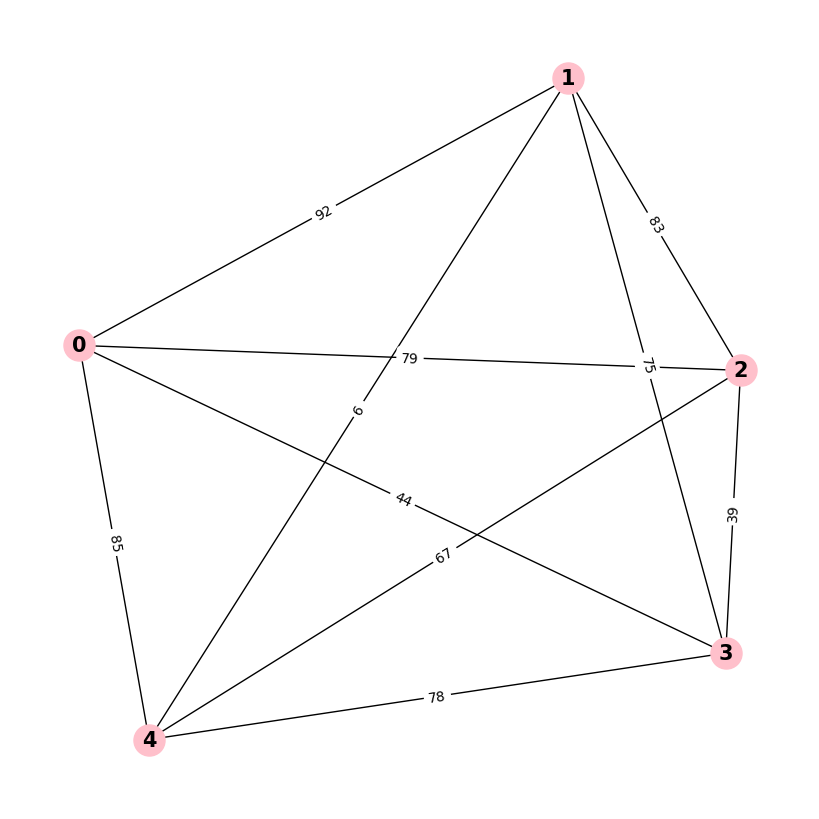

[0, 92, 79, 44, 85]
[100, 0, 83, 75, 6]
[38, 79, 0, 39, 67]
[13, 36, 49, 0, 78]
[60, 1, 93, 11, 0]


In [ ]:
# Test the function for 5 vertices
vertices = 5  # Number of vertices
adj_m = create_dense_graph(vertices)
displayGraph(adj_m)
for matrix in adj_m:
    print(matrix)

# **Part A: Dijkstra's Algorithm with Priority Queue**



### **Dijkstras Algorithm function**




In [ ]:
def dijkstra_matrix_array(adjMatrix, source):
        n = len(adjMatrix)  # Number of vertices
        # Initialize distances array to infinity and the predecessor array to None
        distances = [float('inf')] * n
        distances[source] = 0  # Distance from source to itself is 0
        visited = [False] * n  # To keep track of visited vertices

        # Priority queue implemented using an array (inefficient)
        pq = [(0, source)]  # (distance, vertex)

        while pq:
            # Find the vertex with the minimum distance in pq
            pq.sort()  # Sort the priority queue to ensure the smallest element is first (inefficient)
            current_dist, u = pq.pop(0)  # Remove and return the vertex with the smallest distance

            if visited[u]:
                continue
            visited[u] = True  # Mark the vertex as visited

            # Update distances for all adjacent vertices
            for v in range(n):
                if adjMatrix[u][v] != 0 and not visited[v]:
                    new_dist = current_dist + adjMatrix[u][v]
                    if new_dist < distances[v]:
                        distances[v] = new_dist
                        pq.append((new_dist, v))

        return distances


### **Function To Analyse Time Complexity**

**Empirical**

In [ ]:
def analyze_time_complexity_E(dense_graph):
    # Generate a densely connected graph with n vertices
    #adj_matrix = create_dense_graph(n)
    n = len(dense_graph)
    # Set source vertex as 0
    source = 0

    # Measure the time taken for Dijkstra's algorithm
    time_start = timeit.default_timer()
    distances = dijkstra_matrix_array(dense_graph, source)
    time_stop = timeit.default_timer()

    # Print the results
    print(f"Time taken for Dijkstra's algorithm with {n} vertices: {(time_stop - time_start)*1000} Milliseconds")
    return time_stop - time_start

**Theoretical**

In [ ]:
def theoretical_time_complexity(vertex_counts):
    theoretical_times = []
    for v in vertex_counts:
        time_complexity = (v ** 2)  # O(V^2)
        theoretical_times.append(time_complexity)
    return theoretical_times

## **Explanation**
The time complexity will be O(|V^2|). This is because it ensures that all vertices are visited which will be O(|V|). In each iteration,except for the starting node,all the neighbouring vertices are visited as well as such costing O(|V|-1). Thus the time complexity is O(|V|*|V|-1) which equals to O(|V^2|)

# **Part B: Dijkstra's Algorithm with Minimising Heap**

### **Convert the Adjacency Matrix to an Adjacency List and also to display it**


In [ ]:
def convert_to_adjacency_list(graph):
    adjacency_list = defaultdict(list)
    n = len(graph)
    for i in range(n):
        for j in range(n):
            if graph[i][j] != 0:
                adjacency_list[i].append((j, graph[i][j]))
    return adjacency_list


def print_adjList(adjList):
    for i in adjList:
        print(i, end="")
        for j in adjList[i]:
            print(" -> {}".format(j), end="")
        print()


### **Sample from using the Adjacency Matrix with 5 vertices**

In [ ]:
adj_L = convert_to_adjacency_list(adj_m)
print_adjList(adj_L)

0 -> (1, 90) -> (2, 75) -> (3, 76) -> (4, 84)
1 -> (0, 55) -> (2, 69) -> (3, 36) -> (4, 13)
2 -> (0, 37) -> (1, 66) -> (3, 60) -> (4, 24)
3 -> (0, 4) -> (1, 11) -> (2, 88) -> (4, 4)
4 -> (0, 17) -> (1, 41) -> (2, 95) -> (3, 31)


### **Dijikstra's Algorithm using minimising heap**

In [ ]:
def dijkstra_adjlist_heap(adjList, source):
    n = len(adjList)  # Number of vertices
    # Initialize distances array to infinity and the predecessor array to None
    distances = [float('inf')] * n
    distances[source] = 0  # Distance from source to itself is 0
    visited = [False] * n  # To keep track of visited vertices

    # Priority queue implemented using a minimizing heap
    pq = [(0, source)]  # (distance, vertex)

    while pq:
        current_dist, u = heapq.heappop(pq)  # Pop the vertex with the smallest distance

        if visited[u]:
            continue
        visited[u] = True  # Mark the vertex as visited

        # Update distances for all adjacent vertices
        for neighbor, weight in adjList[u]:
            if not visited[neighbor]:
                new_dist = current_dist + weight
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))

    return distances

## **Function to analyse time complexity**

Empirical:

In [ ]:
def analyze_time_complexity_heap(adjList):
    n = len(adjList)
    source = 0  # Set source vertex as 0

    # Measure the time taken for Dijkstra's algorithm
    time_start = timeit.default_timer()
    distances = dijkstra_adjlist_heap(adjList, source)
    time_stop = timeit.default_timer()

    print(f"Time taken for Dijkstra's algorithm with {n} vertices (Heap): {(time_stop - time_start) * 1000} ms")
    return time_stop - time_start

Theoretical:

In [ ]:
def theoretical_time_complexity_heap(vertex_counts, edge_counts):
    theoretical_times = []
    for i in range(len(vertex_counts)):
        v = vertex_counts[i]
        e = edge_counts[i]
        time_complexity = ((v+e)*math.log(v))#(v + e) * math.log(v)  # O((|V| + |E|) log |V|)
        theoretical_times.append(time_complexity)
    return theoretical_times

### **Plot the Graph for Part A and Part B**
Vertices from 4 to 100 with runtime in milliseconds

In [ ]:
complete_a = {"x": [], "y": []}
complete_b = {"x": [], "y": []}
for v in range(4,101):
    complete_a["x"].append(v)
    complete_b["x"].append(v)
    adj_m2 = create_dense_graph(v)
    runtimeMatrix = analyze_time_complexity_E(adj_m2)*1000
    complete_a["y"].append(runtimeMatrix)
    adjList = convert_to_adjacency_list(adj_m2)
    runtimeList = analyze_time_complexity_heap(adjList) * 1000
    complete_b["y"].append(runtimeList)



vr = complete_a["x"]
theoretical_value_a = theoretical_time_complexity(vr)
max_empirical_a = max(complete_a["y"])
max_theoretical_a = max(theoretical_value_a)
theoretical_times_normalized_a = [t * (max_empirical_a / max_theoretical_a) for t in theoretical_value_a]

edge_counts = [v * (v - 1) for v in complete_b["x"]]
theoretical_value_b = theoretical_time_complexity_heap(complete_b["x"], edge_counts)
max_empirical_b = max(complete_b["y"])
max_theoretical_b = max(theoretical_value_b)
theoretical_times_normalized_b = [t * (max_empirical_b / max_theoretical_b) for t in theoretical_value_b]

Time taken for Dijkstra's algorithm with 4 vertices: 0.024956000061138184 Milliseconds
Time taken for Dijkstra's algorithm with 4 vertices (Heap): 0.017513999978291395 ms
Time taken for Dijkstra's algorithm with 5 vertices: 0.041186000089510344 Milliseconds
Time taken for Dijkstra's algorithm with 5 vertices (Heap): 0.022438999963014794 ms
Time taken for Dijkstra's algorithm with 6 vertices: 0.07407600003261905 Milliseconds
Time taken for Dijkstra's algorithm with 6 vertices (Heap): 0.02207500006079499 ms
Time taken for Dijkstra's algorithm with 7 vertices: 0.04257300008703169 Milliseconds
Time taken for Dijkstra's algorithm with 7 vertices (Heap): 0.022152000042297004 ms
Time taken for Dijkstra's algorithm with 8 vertices: 0.051410000082796614 Milliseconds
Time taken for Dijkstra's algorithm with 8 vertices (Heap): 0.027774000045610592 ms
Time taken for Dijkstra's algorithm with 9 vertices: 0.05726699998831464 Milliseconds
Time taken for Dijkstra's algorithm with 9 vertices (Heap): 0.

## **Plot Graph for Part A**

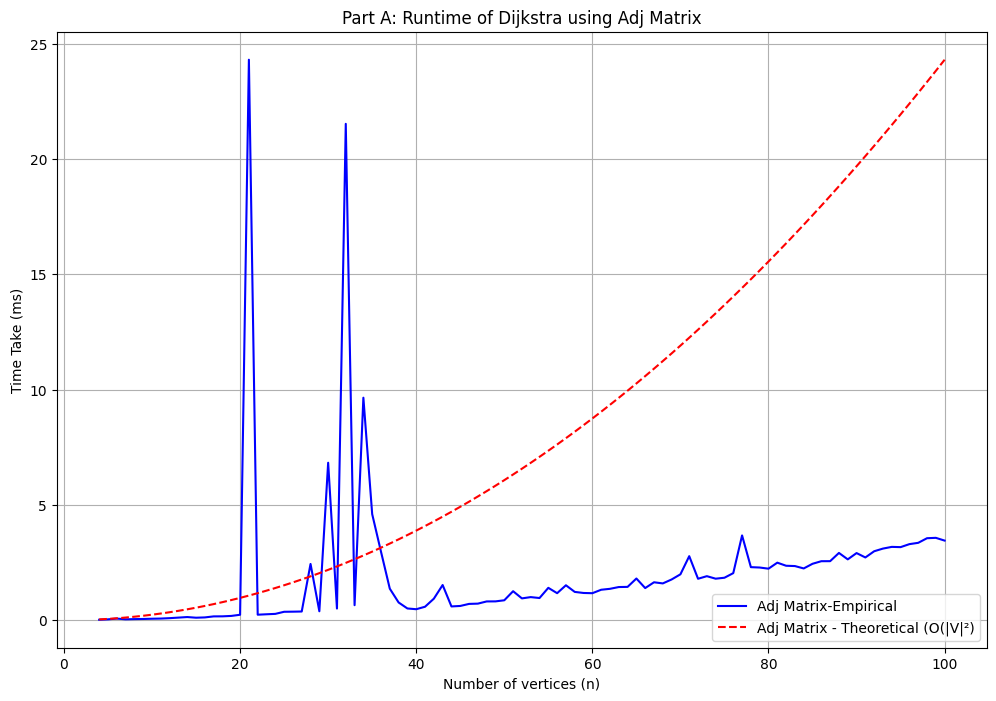

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(complete_a["x"], complete_a["y"], label = "Adj Matrix-Empirical", color = "blue")
plt.plot(complete_a["x"], theoretical_times_normalized_a, label="Adj Matrix - Theoretical (O(|V|²)", color="red", linestyle="--")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Take (ms)")

plt.title("Part A: Runtime of Dijkstra using Adj Matrix")
plt.grid()
plt.legend()
plt.show()

## **Plot Graph for Part B**

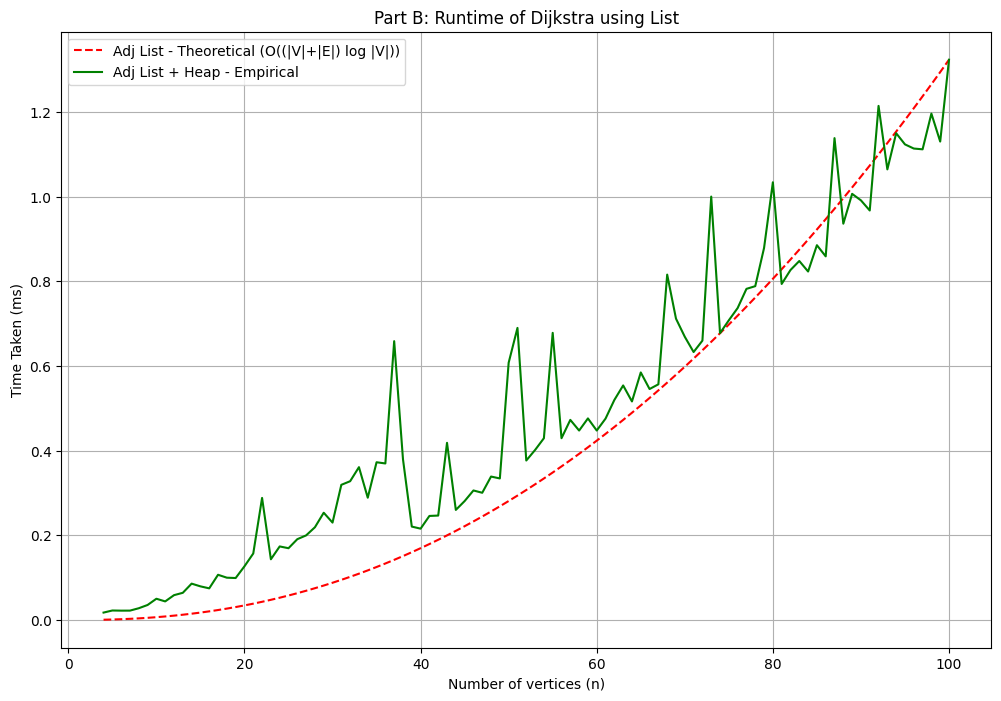

In [ ]:
# Plot both results for comparison
fig = plt.figure()
fig.set_size_inches(12, 8)
#plt.plot(complete_a["x"], complete_a["y"], label = "Adj Matrix - Empirical", color = "blue")
plt.plot(complete_b["x"], theoretical_times_normalized_b, label="Adj List - Theoretical (O((|V|+|E|) log |V|))", color="red", linestyle="--")
plt.plot(complete_b["x"], complete_b["y"], label="Adj List + Heap - Empirical", color="green")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Taken (ms)")
plt.title("Part B: Runtime of Dijkstra using List")
plt.grid()
plt.legend()
plt.show()

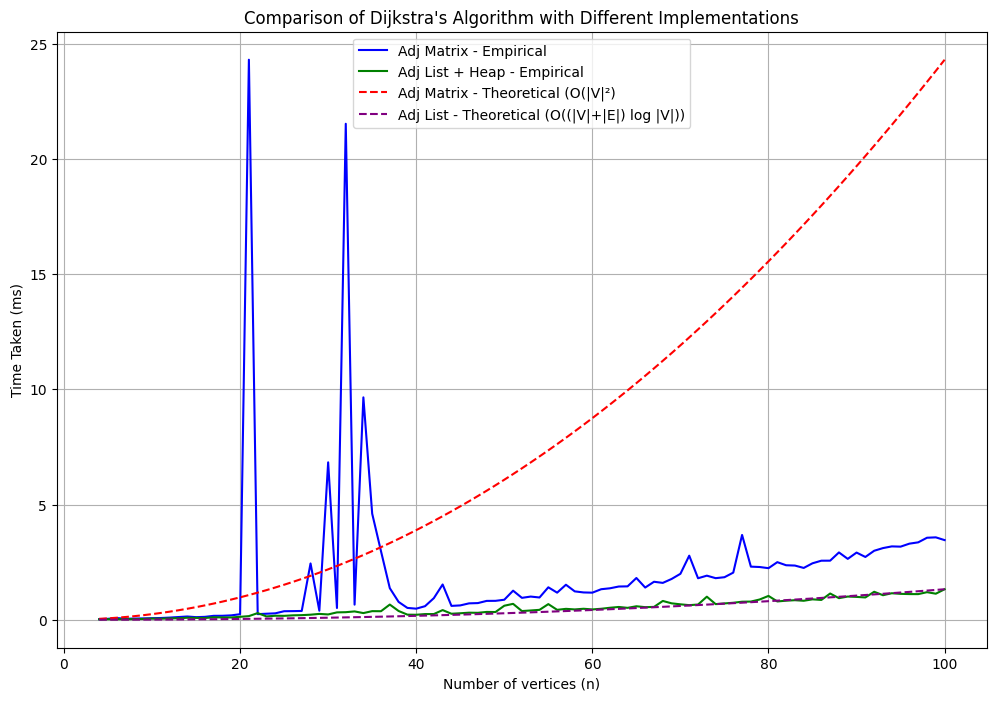

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.plot(complete_a["x"], complete_a["y"], label = "Adj Matrix - Empirical", color = "blue")
#plt.plot(complete_a["x"], theoretical_times_normalized_b, label="Adj List - Theoretical (O((|V|+|E|) log |V|))", color="red", linestyle="--")
plt.plot(complete_b["x"], complete_b["y"], label="Adj List + Heap - Empirical", color="green")
plt.plot(complete_a["x"], theoretical_times_normalized_a, label="Adj Matrix - Theoretical (O(|V|²)", color="red", linestyle="--")
plt.plot(complete_b["x"], theoretical_times_normalized_b, label="Adj List - Theoretical (O((|V|+|E|) log |V|))", color="purple", linestyle="--")

plt.xlabel("Number of vertices (n)")
plt.ylabel("Time Taken (ms)")
plt.title("Comparison of Dijkstra's Algorithm with Different Implementations")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def slider_Runtime_analysis(Vertices):
     matrix_runtime = complete_a['y'][Vertices-4]
     list_runtime = complete_b['y'][Vertices-4]
     print(f"Number of vertices: {complete_a['x'][Vertices-4]}")
     print(f"Runtime for Adjacency Matrix using Priority Queue: {matrix_runtime:.2f} ms")
     print(f"Runtime for Adjacency List using Heap: {list_runtime:.2f} ms")

     fig, ax = plt.subplots(figsize=(10, 8))
     ax.bar(['Adjacency Matrix', 'Adjacency List'],
           [matrix_runtime, list_runtime],
           color=['blue', 'green'])
     ax.set_title(f"Runtime Comparison for {complete_a['x'][Vertices-4]} Vertices")
     ax.set_ylabel("Time (ms)")
     plt.show()

interact(slider_Runtime_analysis, Vertices=widgets.IntSlider(min=4, max=100, step=1, value=10));


interactive(children=(IntSlider(value=10, description='Vertices', min=4), Output()), _dom_classes=('widget-int…